In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
products_df = pd.read_excel('./data/Excel_Sheets/Products_spreadsheet.xlsx')
orders_df = pd.read_excel('./data/Excel_Sheets/Orders_spreadsheet.xlsx')
customers_df = pd.read_excel('./data/Excel_Sheets/Customers_spreadsheet.xlsx')


In [3]:
products_df.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [4]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [5]:
products_df.describe()

,Size,Unit Price,Price per 100g,Profit
count,48.000000,48.000000,48.000000,48.000000
mean,1.050000,13.046250,1.435087,1.316219
std,0.893951,9.953578,0.371981,1.161426
min,0.200000,2.685000,0.823400,0.161100
25%,0.425000,5.216250,1.191400,0.501300
50%,0.750000,9.230000,1.370600,0.943800
75%,1.375000,17.033750,1.659375,1.657700
max,2.500000,36.455000,2.377500,4.739150


In [6]:
orders_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Product ID     1000 non-null   object        
 4   Quantity       1000 non-null   float64       
 5   Customer Name  0 non-null      float64       
 6   Email          0 non-null      float64       
 7   Country        0 non-null      float64       
 8   Coffee Type    0 non-null      float64       
 9   Roast Type     0 non-null      float64       
 10  Size           0 non-null      float64       
 11  Unit Price     0 non-null      float64       
 12  Sales          0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 101.7+ KB


In [8]:
orders_df.describe()

,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
count,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.681733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
orders_list = ['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type']
for string in orders_list:
    orders_df[string] = orders_df[string].astype(str)

In [10]:
customers_df.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205.0,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711.0,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         1000 non-null   object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [12]:
customers_df.describe()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
count,1000,1000,796,870,1000,1000,1000,1000,1000
unique,1000,1000,796,870,1000,386,3,629,2
top,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Washington,United States,D04,No
freq,1,1,1,1,1,27,782,12,513


In [13]:
orders_products_df = pd.merge(orders_df, products_df, how='inner', on='Product ID', suffixes=('_remove', ''))
orders_products_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type_remove,Roast Type_remove,Size_remove,Unit Price_remove,Sales,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,nan,nan,nan,nan,nan,NaN,NaN,NaN,Rob,M,1.0,9.95,0.995,0.597
1,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,nan,nan,nan,nan,nan,NaN,NaN,NaN,Rob,M,1.0,9.95,0.995,0.597
2,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,nan,nan,nan,nan,nan,NaN,NaN,NaN,Rob,M,1.0,9.95,0.995,0.597
3,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,nan,nan,nan,nan,nan,NaN,NaN,NaN,Rob,M,1.0,9.95,0.995,0.597
4,JDS-33440-914,2021-10-28,58511-10548-ZU,R-M-1,3.0,nan,nan,nan,nan,nan,NaN,NaN,NaN,Rob,M,1.0,9.95,0.995,0.597


In [14]:
orders_products_df.drop(columns=['Coffee Type_remove', 'Roast Type_remove', 'Size_remove',
                                'Unit Price_remove'], inplace=True)

In [15]:
orders_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   float64       
 5   Customer Name   1000 non-null   object        
 6   Email           1000 non-null   object        
 7   Country         1000 non-null   object        
 8   Sales           0 non-null      float64       
 9   Coffee Type     1000 non-null   object        
 10  Roast Type      1000 non-null   object        
 11  Size            1000 non-null   float64       
 12  Unit Price      1000 non-null   float64       
 13  Price per 100g  1000 non-null   float64       
 14  Profit          1000 non-null   float64       
dtypes: da

In [16]:
coffee_df = pd.merge(orders_products_df, customers_df, how='inner', on='Customer ID',
                    suffixes=('_remove',''))
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name_remove,Email_remove,Country_remove,Sales,Coffee Type,...,Price per 100g,Profit,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,nan,nan,nan,NaN,Rob,...,0.995,0.5970,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,nan,nan,nan,NaN,Exc,...,1.650,0.9075,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
2,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,nan,nan,nan,NaN,Rob,...,0.995,0.5970,Rosaleen Scholar,rscholarc@nyu.edu,+1 (804) 420-0420,80915 Montana Park,Richmond,United States,23285.0,No
3,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,nan,nan,nan,NaN,Rob,...,0.995,0.5970,Hy Zanetto,NaN,NaN,469 Paget Place,Tucson,United States,85715.0,Yes
4,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,nan,nan,nan,NaN,Rob,...,0.995,0.5970,Gay Rizzello,grizzello1x@symantec.com,+44 (247) 225-8003,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes


We dont need email, name, or phone number, going to remove them.

In [17]:
coffee_df.drop(columns=['Customer Name_remove', 'Email_remove', 'Country_remove',
                       'Customer Name', 'Email', 'Phone Number'], inplace=True)

In [18]:
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Sales,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Address Line 1,City,Country,Postcode,Loyalty Card
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,NaN,Exc,M,0.5,8.25,1.650,0.9075,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
2,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,80915 Montana Park,Richmond,United States,23285.0,No
3,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,469 Paget Place,Tucson,United States,85715.0,Yes
4,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes


In [19]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   float64       
 5   Sales           0 non-null      float64       
 6   Coffee Type     1000 non-null   object        
 7   Roast Type      1000 non-null   object        
 8   Size            1000 non-null   float64       
 9   Unit Price      1000 non-null   float64       
 10  Price per 100g  1000 non-null   float64       
 11  Profit          1000 non-null   float64       
 12  Address Line 1  1000 non-null   object        
 13  City            1000 non-null   object        
 14  Country         1000 non-null   object        
 15  Postc

In [20]:
coffee_df.describe()

,Quantity,Sales,Size,Unit Price,Price per 100g,Profit
count,1000.000000,0.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.551000,NaN,1.037300,12.908080,1.438336,1.301375
std,1.681733,NaN,0.884025,9.772455,0.365525,1.128052
min,1.000000,NaN,0.200000,2.685000,0.823400,0.161100
25%,2.000000,NaN,0.500000,5.370000,1.191400,0.505050
50%,4.000000,NaN,0.500000,8.950000,1.366200,0.980100
75%,5.000000,NaN,1.000000,15.850000,1.650000,1.649100
max,6.000000,NaN,2.500000,36.455000,2.377500,4.739150


In [21]:
coffee_df['Coffee Type'].value_counts()

Ara    264
Lib    248
Exc    247
Rob    241
Name: Coffee Type, dtype: int64

In [22]:
coffee_df['Roast Type'].value_counts()

M    334
D    333
L    333
Name: Roast Type, dtype: int64

Not certain what size is referring to exactly. Going to calculate bag weight to see if I can gain more information

In [23]:
coffee_df['Size'].value_counts()

0.5    268
0.2    249
2.5    247
1.0    236
Name: Size, dtype: int64

In [24]:
 coffee_df['Country'].value_counts()

United States     774
Ireland           153
United Kingdom     73
Name: Country, dtype: int64

Okay so it looks like Size is referring to how many kg the unit sold weighs. Going to make this more explicit by changing column name.

In [25]:
coffee_df['Unit Weight(g)'] = 100 * (coffee_df['Unit Price'] / coffee_df['Price per 100g'])
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Sales,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Address Line 1,City,Country,Postcode,Loyalty Card,Unit Weight(g)
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes,1000.0
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,NaN,Exc,M,0.5,8.25,1.650,0.9075,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes,500.0
2,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,80915 Montana Park,Richmond,United States,23285.0,No,1000.0
3,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,469 Paget Place,Tucson,United States,85715.0,Yes,1000.0
4,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes,1000.0


In [26]:
coffee_df.rename(columns={'Size': 'Unit Weight(kg)', 'Profit': 'Unit Profit'}, inplace=True)
coffee_df.drop(columns='Unit Weight(g)', inplace=True)

In [27]:
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Sales,Coffee Type,Roast Type,Unit Weight(kg),Unit Price,Price per 100g,Unit Profit,Address Line 1,City,Country,Postcode,Loyalty Card
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,NaN,Exc,M,0.5,8.25,1.650,0.9075,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes
2,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,80915 Montana Park,Richmond,United States,23285.0,No
3,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,469 Paget Place,Tucson,United States,85715.0,Yes
4,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,NaN,Rob,M,1.0,9.95,0.995,0.5970,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes


In [28]:
coffee_df['Sales'] = coffee_df['Quantity'] * coffee_df['Unit Price']
coffee_df['Order Profit'] = coffee_df['Quantity'] * coffee_df['Unit Profit']
coffee_df['Unit Profit Percentage'] = coffee_df['Unit Profit'] / coffee_df['Unit Price']

Another thing to consider is the currency that the dataset is using for information here. The originial publisher of the dataset is from Ireland, and considering the Ireland and UK are included in the Countries that the product is being purchased from, and that the weight of the units purchased was in kilograms, I suspect that the pricing is in Euros.

Although we can't tell with absolute certainty, we will move forward as though all columns referring to price, sales, and more are in Euros.

In [29]:
coffee_df.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Sales,Coffee Type,Roast Type,Unit Weight(kg),Unit Price,Price per 100g,Unit Profit,Address Line 1,City,Country,Postcode,Loyalty Card,Order Profit,Unit Profit Percentage
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,19.90,Rob,M,1.0,9.95,0.995,0.5970,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes,1.1940,0.06
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,41.25,Exc,M,0.5,8.25,1.650,0.9075,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes,4.5375,0.11
2,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,49.75,Rob,M,1.0,9.95,0.995,0.5970,80915 Montana Park,Richmond,United States,23285.0,No,2.9850,0.06
3,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,59.70,Rob,M,1.0,9.95,0.995,0.5970,469 Paget Place,Tucson,United States,85715.0,Yes,3.5820,0.06
4,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,59.70,Rob,M,1.0,9.95,0.995,0.5970,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes,3.5820,0.06


In [30]:
coffee_df.describe()

,Quantity,Sales,Unit Weight(kg),Unit Price,Price per 100g,Unit Profit,Order Profit,Unit Profit Percentage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.551000,45.134255,1.037300,12.908080,1.438336,1.301375,4.520217,0.097630
std,1.681733,42.220454,0.884025,9.772455,0.365525,1.128052,4.647257,0.025592
min,1.000000,2.685000,0.200000,2.685000,0.823400,0.161100,0.161100,0.060000
25%,2.000000,15.540000,0.500000,5.370000,1.191400,0.505050,1.398600,0.090000
50%,4.000000,29.785000,0.500000,8.950000,1.366200,0.980100,2.904150,0.090000
75%,5.000000,59.700000,1.000000,15.850000,1.650000,1.649100,6.075000,0.110000
max,6.000000,218.730000,2.500000,36.455000,2.377500,4.739150,28.434900,0.130000


In [31]:
coffee_df['Loyalty Card'].value_counts()

No     521
Yes    479
Name: Loyalty Card, dtype: int64

In [32]:
#enc = OneHotEncoder()
#coffee_type_df = pd.DataFrame(enc.fit_transform(coffee_df[['Coffee Type']]).toarray())
#coffee_df = coffee_df.join(coffee_type_df)
#coffee_df.rename(columns={0: 'Ara', 1: 'Exc', 2: 'Lib', 3: 'Rob'}, inplace=True)
#country_df = pd.DataFrame(enc.fit_transform(coffee_df[['Country']]).toarray())
#coffee_df = coffee_df.join(country_df)
#coffee_df.rename(columns={0: 'Ireland', 1: 'United Kingdom', 2: 'United States'}, inplace=True)

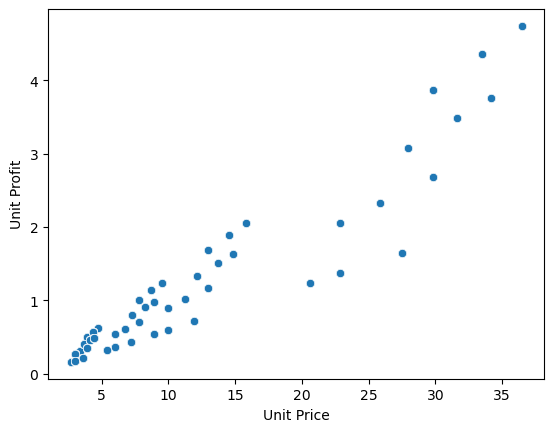

In [33]:
sns.scatterplot(data=coffee_df, x='Unit Price', y='Unit Profit')

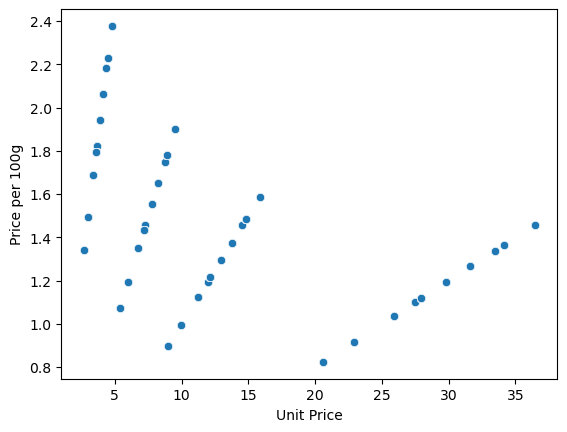

In [34]:
sns.scatterplot(data=coffee_df, x='Unit Price', y='Price per 100g')

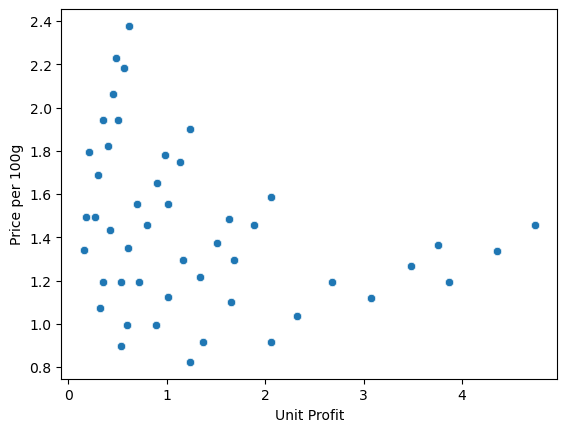

In [35]:
sns.scatterplot(data=coffee_df, x='Unit Profit', y='Price per 100g')

In [36]:
coffee_df['City'].value_counts()

Washington         26
New York City      17
Houston            15
Oklahoma City      15
Birmingham         13
                   ..
Hyattsville         1
Bayside             1
Castleknock         1
Saint Augustine     1
Fairbanks           1
Name: City, Length: 375, dtype: int64

In [37]:
coffee_df['Unit Price'].value_counts()

5.970     47
7.770     46
29.785    46
2.985     44
12.950    38
22.885    36
9.950     33
3.885     33
6.750     30
11.250    28
25.875    27
3.585     26
2.685     26
4.755     25
4.365     24
7.290     24
13.750    23
31.625    23
8.910     23
11.950    23
20.585    22
15.850    21
14.850    21
9.510     21
8.250     21
8.730     20
27.485    20
36.455    20
27.945    20
3.645     20
4.455     19
7.170     18
5.370     18
34.155    18
12.150    18
14.550    17
4.125     17
33.465    15
3.375     15
8.950     14
Name: Unit Price, dtype: int64

In [38]:
coffee_df.to_csv('./data/coffee.csv')

In [39]:
coffee_df['Unit Profit Percentage'].value_counts()

0.13    248
0.11    247
0.06    182
0.09    149
0.09     65
0.06     59
0.09     50
Name: Unit Profit Percentage, dtype: int64

In [40]:
roast_df = coffee_df.groupby(['Roast Type', 'Country']).Quantity.sum().reset_index()

In [41]:
roast_df

,Roast Type,Country,Quantity
0,D,Ireland,224.0
1,D,United Kingdom,64.0
2,D,United States,868.0
3,L,Ireland,180.0
4,L,United Kingdom,86.0
5,L,United States,964.0
6,M,Ireland,133.0
7,M,United Kingdom,104.0
8,M,United States,928.0


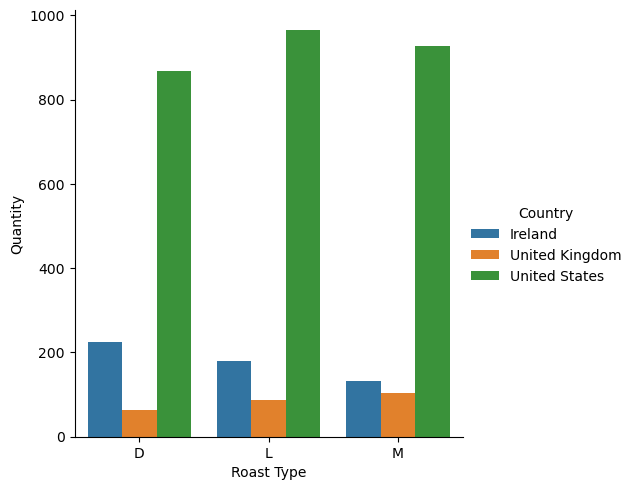

In [42]:
sns.catplot(data=roast_df, kind='bar', x='Roast Type', y= 'Quantity', hue='Country')

In [43]:
roast_df['Total Quantity'] = roast_df.groupby('Country')['Quantity'].transform('sum')

In [44]:
roast_df['Percent Purchased'] = 100 * roast_df['Quantity'] / roast_df['Total Quantity']

In [45]:
roast_df

,Roast Type,Country,Quantity,Total Quantity,Percent Purchased
0,D,Ireland,224.0,537.0,41.713222
1,D,United Kingdom,64.0,254.0,25.196850
2,D,United States,868.0,2760.0,31.449275
3,L,Ireland,180.0,537.0,33.519553
4,L,United Kingdom,86.0,254.0,33.858268
5,L,United States,964.0,2760.0,34.927536
6,M,Ireland,133.0,537.0,24.767225
7,M,United Kingdom,104.0,254.0,40.944882
8,M,United States,928.0,2760.0,33.623188


Based on the graph below, Ireland has a clear preference in Dark roast coffee, while The UK prefers Medium. The US ever so slightly favors light roast but the differences in percent purchased are much smaller so I would not consider this as showing a clear preference. 

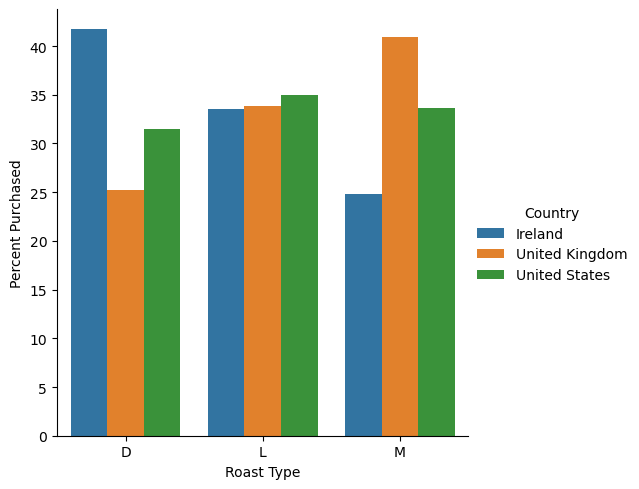

In [46]:
sns.catplot(data=roast_df, kind='bar', x='Roast Type', y= 'Percent Purchased', hue='Country')

In [47]:
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Sales,Coffee Type,Roast Type,Unit Weight(kg),Unit Price,Price per 100g,Unit Profit,Address Line 1,City,Country,Postcode,Loyalty Card,Order Profit,Unit Profit Percentage
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2.0,19.900,Rob,M,1.0,9.950,0.9950,0.59700,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes,1.19400,0.06
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5.0,41.250,Exc,M,0.5,8.250,1.6500,0.90750,57999 Pepper Wood Alley,Paterson,United States,7505.0,Yes,4.53750,0.11
2,SZW-48378-399,2022-07-02,34136-36674-OM,R-M-1,5.0,49.750,Rob,M,1.0,9.950,0.9950,0.59700,80915 Montana Park,Richmond,United States,23285.0,No,2.98500,0.06
3,OFX-99147-470,2021-11-24,49860-68865-AB,R-M-1,6.0,59.700,Rob,M,1.0,9.950,0.9950,0.59700,469 Paget Place,Tucson,United States,85715.0,Yes,3.58200,0.06
4,JHW-74554-805,2019-11-26,14103-58987-ZU,R-M-1,6.0,59.700,Rob,M,1.0,9.950,0.9950,0.59700,21 Schmedeman Crossing,Liverpool,United Kingdom,L33,Yes,3.58200,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,HBY-35655-049,2020-05-04,69207-93422-CQ,E-D-2.5,3.0,83.835,Exc,D,2.5,27.945,1.1178,3.07395,2900 Pennsylvania Court,Fairbanks,United States,99709.0,Yes,9.22185,0.11
996,NJR-03699-189,2019-10-08,95152-82155-VQ,E-D-2.5,1.0,27.945,Exc,D,2.5,27.945,1.1178,3.07395,5251 Everett Way,Austin,United States,78726.0,No,3.07395,0.11
997,TNR-84447-052,2019-01-09,34419-18068-AG,E-D-2.5,4.0,111.780,Exc,D,2.5,27.945,1.1178,3.07395,3 Jenifer Circle,Portland,United States,97271.0,No,12.29580,0.11
998,ORX-57454-917,2021-09-06,76209-39601-ZR,E-D-2.5,3.0,83.835,Exc,D,2.5,27.945,1.1178,3.07395,934 Loomis Junction,London,United Kingdom,EC3M,Yes,9.22185,0.11


In [48]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   object        
 1   Order Date              1000 non-null   datetime64[ns]
 2   Customer ID             1000 non-null   object        
 3   Product ID              1000 non-null   object        
 4   Quantity                1000 non-null   float64       
 5   Sales                   1000 non-null   float64       
 6   Coffee Type             1000 non-null   object        
 7   Roast Type              1000 non-null   object        
 8   Unit Weight(kg)         1000 non-null   float64       
 9   Unit Price              1000 non-null   float64       
 10  Price per 100g          1000 non-null   float64       
 11  Unit Profit             1000 non-null   float64       
 12  Address Line 1          1000 non-null   object   

In [49]:
coffee_df.drop(columns=['Customer ID', 'Address Line 1'], inplace=True)

In [50]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   object        
 1   Order Date              1000 non-null   datetime64[ns]
 2   Product ID              1000 non-null   object        
 3   Quantity                1000 non-null   float64       
 4   Sales                   1000 non-null   float64       
 5   Coffee Type             1000 non-null   object        
 6   Roast Type              1000 non-null   object        
 7   Unit Weight(kg)         1000 non-null   float64       
 8   Unit Price              1000 non-null   float64       
 9   Price per 100g          1000 non-null   float64       
 10  Unit Profit             1000 non-null   float64       
 11  City                    1000 non-null   object        
 12  Country                 1000 non-null   object   

In [61]:
product_df = coffee_df.groupby(['Product ID', 'Country', 'Unit Price', 'Unit Profit', 
                               'Unit Profit Percentage', 'Unit Weight(kg)', 
                                'Coffee Type', 'Roast Type']).Quantity.sum().reset_index() 

In [62]:
product_df

,Product ID,Country,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Coffee Type,Roast Type,Quantity
0,A-D-0.2,Ireland,2.985,0.26865,0.09,0.2,Ara,D,27.0
1,A-D-0.2,United States,2.985,0.26865,0.09,0.2,Ara,D,70.0
2,A-D-0.5,Ireland,5.970,0.53730,0.09,0.5,Ara,D,16.0
3,A-D-0.5,United Kingdom,5.970,0.53730,0.09,0.5,Ara,D,5.0
4,A-D-0.5,United States,5.970,0.53730,0.09,0.5,Ara,D,68.0
...,...,...,...,...,...,...,...,...,...
126,R-M-1,United Kingdom,9.950,0.59700,0.06,1.0,Rob,M,12.0
127,R-M-1,United States,9.950,0.59700,0.06,1.0,Rob,M,51.0
128,R-M-2.5,Ireland,22.885,1.37310,0.06,2.5,Rob,M,4.0
129,R-M-2.5,United Kingdom,22.885,1.37310,0.06,2.5,Rob,M,6.0


In [87]:
product_df['Total Quantity'] = product_df.groupby('Country')['Quantity'].transform('sum')
product_df['Percent Purchased'] = product_df['Quantity'] / product_df['Total Quantity']
product_df['Total Unit Sales'] = product_df['Unit Price'] * product_df['Quantity']
product_df ['Total Unit Profit'] = product_df['Unit Profit'] * product_df['Quantity']
product_df['Total Unit Weight Sold'] = product_df['Unit Weight(kg)'] * product_df['Quantity']
product_df['Total Weight'] = product_df.groupby('Country')['Total Unit Weight Sold'].transform('sum')
product_df['Percent of Total Weight Shipped'] = product_df['Total Unit Weight Sold'] / product_df['Total Weight']

In [91]:
product_df.head(30)

,Product ID,Country,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Coffee Type,Roast Type,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
123,R-M-0.5,United Kingdom,5.970,0.35820,0.06,0.5,Rob,M,16.0,254.0,0.062992,95.520,5.73120,8.0,217.2,0.036832
74,L-L-0.2,United Kingdom,4.755,0.61815,0.13,0.2,Lib,L,16.0,254.0,0.062992,76.080,9.89040,3.2,217.2,0.014733
107,R-L-0.2,Ireland,3.585,0.21510,0.06,0.2,Rob,L,30.0,537.0,0.055866,107.550,6.45300,6.0,544.3,0.011023
52,E-M-0.2,United Kingdom,4.125,0.45375,0.11,0.2,Exc,M,14.0,254.0,0.055118,57.750,6.35250,2.8,217.2,0.012891
43,E-L-0.5,United Kingdom,8.910,0.98010,0.11,0.5,Exc,L,13.0,254.0,0.051181,115.830,12.74130,6.5,217.2,0.029926
0,A-D-0.2,Ireland,2.985,0.26865,0.09,0.2,Ara,D,27.0,537.0,0.050279,80.595,7.25355,5.4,544.3,0.009921
104,R-D-2.5,Ireland,20.585,1.23510,0.06,2.5,Rob,D,26.0,537.0,0.048417,535.210,32.11260,65.0,544.3,0.119419
89,L-M-0.5,United Kingdom,8.730,1.13490,0.13,0.5,Lib,M,12.0,254.0,0.047244,104.760,13.61880,6.0,217.2,0.027624
126,R-M-1,United Kingdom,9.950,0.59700,0.06,1.0,Rob,M,12.0,254.0,0.047244,119.400,7.16400,12.0,217.2,0.055249
70,L-D-2.5,Ireland,29.785,3.87205,0.13,2.5,Lib,D,24.0,537.0,0.044693,714.840,92.92920,60.0,544.3,0.110233


In [75]:
product_df.sort_values(by='Percent Purchased', ascending=False, inplace=True )

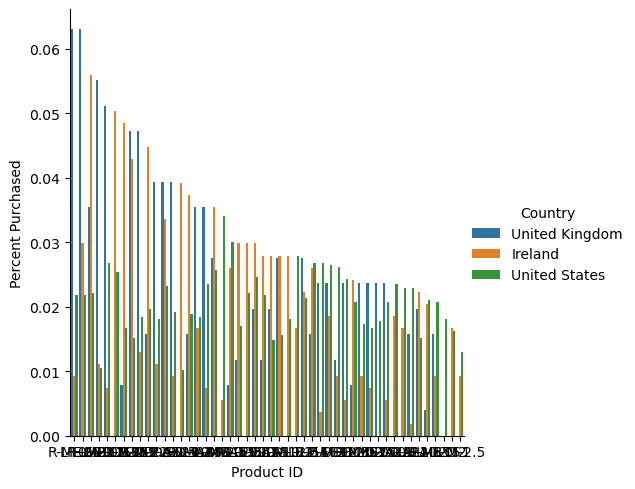

In [76]:
sns.catplot(data=product_df, kind='bar', x='Product ID', y='Percent Purchased', hue='Country')

In [77]:
ireland = product_df[product_df['Country'] == 'Ireland'].head(10)
uk= product_df[product_df['Country'] == 'United Kingdom'].head(10)
us= product_df[product_df['Country'] == 'United States'].head(10)

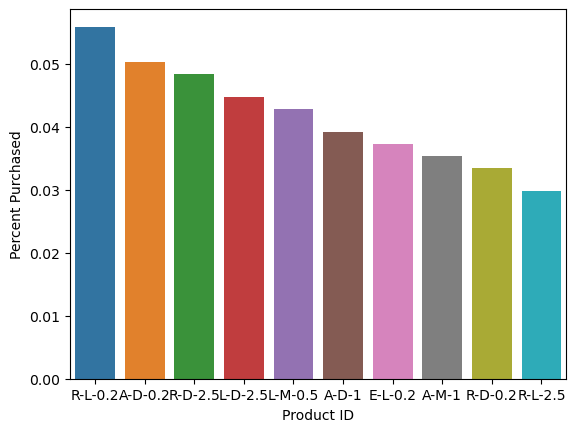

In [78]:
sns.barplot(data=ireland, x='Product ID', y='Percent Purchased')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

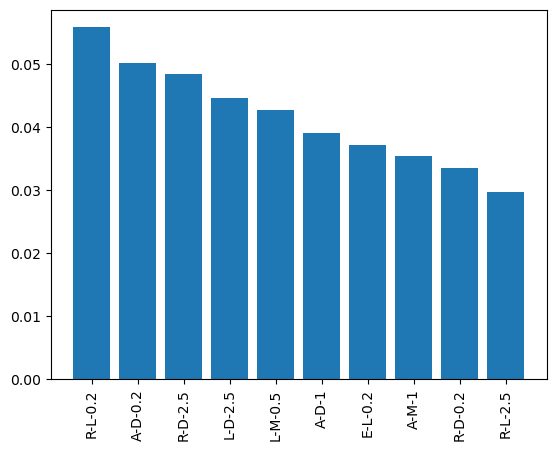

In [79]:
plt.bar(ireland['Product ID'], ireland['Percent Purchased'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

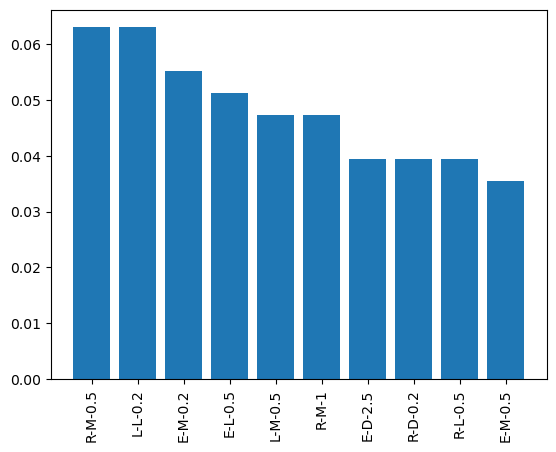

In [80]:
plt.bar(uk['Product ID'], uk['Percent Purchased'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

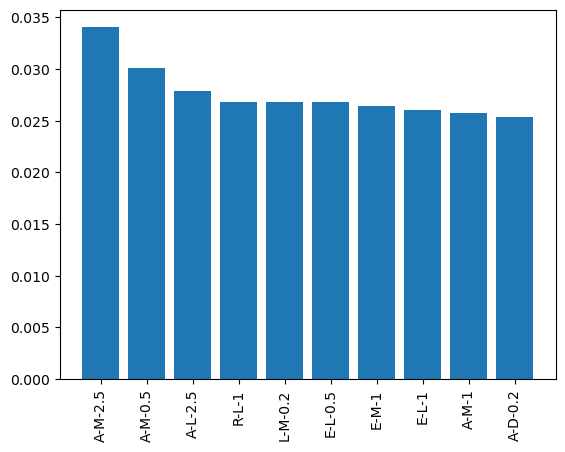

In [81]:
plt.bar(us['Product ID'], us['Percent Purchased'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

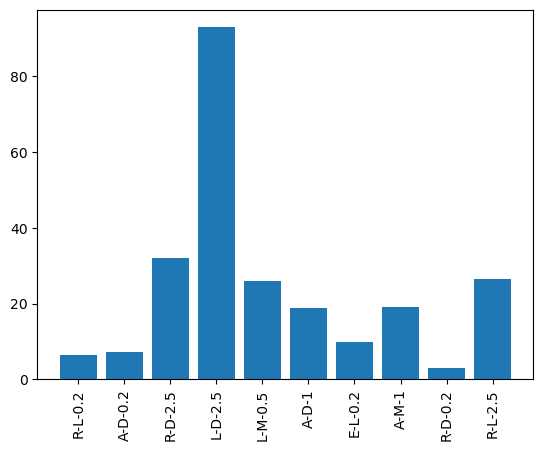

In [83]:
plt.bar(ireland['Product ID'], ireland['Total Unit Profit'])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

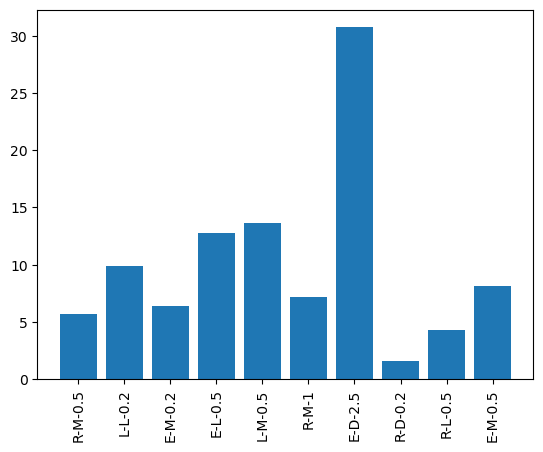

In [89]:
plt.bar(uk['Product ID'], uk['Total Unit Profit'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

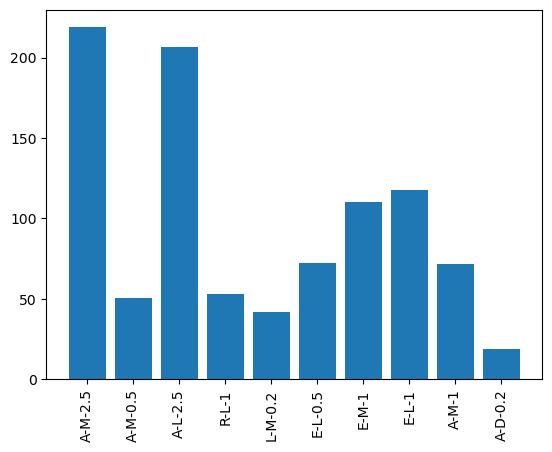

In [92]:
plt.bar(us['Product ID'], us['Total Unit Profit'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

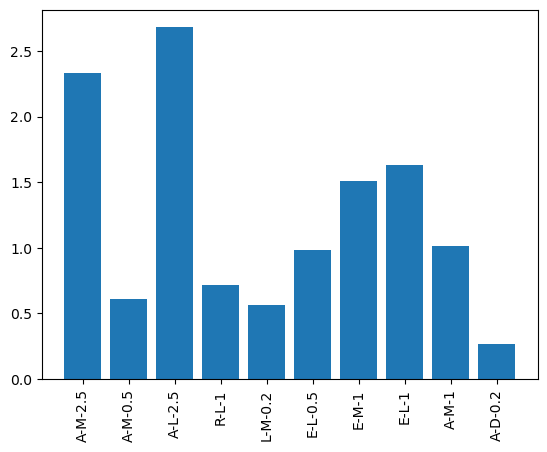

In [93]:
plt.bar(us['Product ID'], us['Unit Profit'])
plt.xticks(rotation=90)

When looking at the U.S. graphs, the most purchased product and most profitable product are the same. It is he Arabica Medium roast 2.5 kg product (Product ID A-M-2.5)